# K Means Clustering

K-means clustering merupakan algoritma unsupervised machine learning  yang simpel dan sangat populer.

Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:

- The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the k-means model. We will soon dive into exactly how the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the k-means result.

### Cara Kerja K Means
  Inisialisi : Pilih k titik acak sebagai pusat cluster (centroid)  

  Iterasi:  
    - Hitung jarak setiap titik ke centroid   
    - Tentukan cluster dari titik tersebut berdasarkan jarak terdekat   
    - Ubah centroid dengan mengambil rata-rata dari titik yang berada di cluster yang sama 

  Berhenti berdasarkan kriteria berikut:  
    - Tidak ada perubahan cluster   
    - Jumlah iterasi sudah mencapai batas maksimum

Cara menghitung jarak tiap titik ke centroid  
  - Jarak euclidean  
  - Jarak manhattan  

Kali ini kita menggunakan jarak euclidean untuk menghitung jarak tiap titik ke centroidnya

In [1]:
def euclidean_distance(point_1: list, point_2: list) -> float:
    return sum([(a - b) ** 2 for a, b in zip(point_1, point_2)]) ** 0.5


Dan untuk menghitung jarak di antara centroid dengan titik lainnya kita menggunakan fungsi berikut

In [2]:
def closest_point(point: list, centroids: list) -> list: 
    return min(centroids, key=lambda centroid: euclidean_distance(point, centroid))

Lalu kita akan menghitung rata-rata dari titik yang berada di cluster yang sama

In [3]:
def mean(points: list) -> list:
    return [sum(x) / len(x) for x in zip(*points)]

Setelah semua fungsi di atas sudah kita buat, kita akan membuat implementasi kelas KMeans

In [4]:
import random
class KMeans:
    def __init__(self, data: list, n_clusters=2, max_iteration=300, n_init=10):
        self.n_clusters = n_clusters
        self.data = data
        self.max_iteration = max_iteration
        self.n_init = n_init

        self.centroids = []
        self.clusters = []
        self.inertia = None

    def kmeans(self):
        centroids = random.sample(self.data, self.n_clusters)
        for _ in range(self.max_iteration):
            clusters = [[] for _ in range(self.n_clusters)]
            for x in self.data:
                closest = closest_point(x, centroids)
                clusters[centroids.index(closest)].append(x)
            new_centroids = []
            for cluster in clusters:
                new_centroids.append(mean(cluster))
            if new_centroids == centroids:
                break
            centroids = new_centroids
        return centroids, clusters

Dikarenakan pengambilan centroid awal dilakukan secara random, hasil clustering yang didapatkan tidak akan selalu optimal. 

In [5]:
for i in range(10):
    kmeans = KMeans([[1, 2], [1, 4], [10, 2], [10, 4]])
    centroids, clusters = kmeans.kmeans()
    print(f"Iteration {i}: {centroids}")

Iteration 0: [[5.5, 2.0], [5.5, 4.0]]
Iteration 1: [[1.0, 3.0], [10.0, 3.0]]
Iteration 2: [[1.0, 3.0], [10.0, 3.0]]
Iteration 3: [[1.0, 3.0], [10.0, 3.0]]
Iteration 4: [[10.0, 3.0], [1.0, 3.0]]
Iteration 5: [[10.0, 3.0], [1.0, 3.0]]
Iteration 6: [[1.0, 3.0], [10.0, 3.0]]
Iteration 7: [[1.0, 3.0], [10.0, 3.0]]
Iteration 8: [[5.5, 2.0], [5.5, 4.0]]
Iteration 9: [[10.0, 3.0], [1.0, 3.0]]


Oleh karena itu kita akan mengulang proses clustering sebanyak n_init kali dan dan menghitung nilai inertia untuk setiap centroid yang didapatkan. Lalu kita akan mengambil centroid dengan nilai inertia terkecil

In [6]:
def fit(self):
    for _ in range(self.n_init):
        centroids, clusters = self.kmeans()

        current_inertia = 0
        for centroid, cluster in zip(centroids, clusters):
            for point in cluster:
                current_inertia += euclidean_distance(point, centroid) ** 2
        if self.inertia is None or current_inertia < self.inertia:
            self.inertia = current_inertia
            self.centroids = centroids
            self.clusters = clusters
            
KMeans.fit = fit

for i in range(5):
    kmeans = KMeans([[1, 2], [1, 4], [10, 2], [10, 4]])
    kmeans.fit()
    print(kmeans.centroids)

[[10.0, 3.0], [1.0, 3.0]]
[[1.0, 3.0], [10.0, 3.0]]
[[1.0, 3.0], [10.0, 3.0]]
[[10.0, 3.0], [1.0, 3.0]]
[[1.0, 3.0], [10.0, 3.0]]


Sebelum melakukan percobaan, kita akan mengimport library dan fungsi yang dibutuhkan

In [7]:
def generate_random_data(n=100, k=2, min=0, max=100) -> list:
    return [[random.randint(min, max) for _ in range(k)] for _ in range(n)]

import matplotlib.pyplot as plt

def plot_2d(data: list, centroids: list):
    colors = ['r', 'y', 'b', 'c', 'k', 'g', 'm']
    for i, centroid in enumerate(centroids):
        plt.scatter([x[0] for x in data[i]], [x[1]
                                              for x in data[i]], c=colors[i])
        plt.scatter(centroid[0], centroid[1], c='black', marker='x')

    plt.show()


def plot_3d(clusters: list, centroids: list):
    colors = ['r', 'y', 'b', 'c', 'k', 'g', 'm']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i, cluster in enumerate(clusters):
        ax.scatter([x[0] for x in cluster], [x[1]
                                             for x in cluster], [x[2] for x in cluster], c=colors[i])
        ax.scatter(centroids[i][0], centroids[i][1],
                   centroids[i][2], c='black', marker='x')

Uji coba k-means clustering dengan dataset acak

[[78.25, 52.07142857142857], [28.40909090909091, 57.36363636363637]]


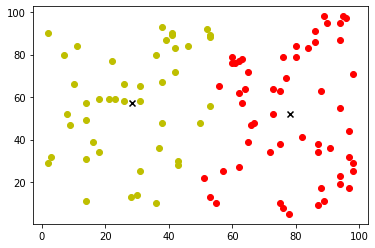

In [50]:
data = generate_random_data(n=100, k=2)
kmeans = KMeans(data, n_clusters=2)
kmeans.fit()
print(kmeans.centroids)
plot_2d(kmeans.clusters, kmeans.centroids)